In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic financial data (rounded to 2 decimal places)
profit_margin = np.round(np.random.normal(loc=5, scale=2, size=50), 2)
revenue_growth = np.round(np.random.normal(loc=10, scale=3, size=50), 2)

# Create a DataFrame
df = pd.DataFrame({'Profit_Margin': profit_margin, 'Revenue_Growth': revenue_growth})

print(df.head())


   Profit_Margin  Revenue_Growth
0           5.99           10.97
1           4.72            8.84
2           6.30            7.97
3           8.05           11.84
4           4.53           13.09


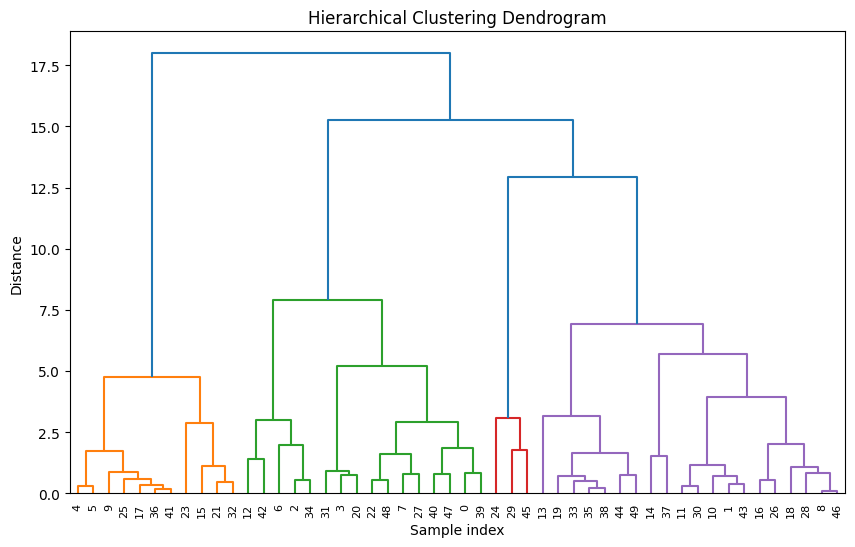

In [3]:
# Compute the linkage matrix using the 'ward' method (commonly used)
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90)  # Rotate leaf labels for better readability
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Save as JPEG for textbook publication purposes
plt.savefig('Figure 14.12 Hierarchical Clustering Dendrogram.jpeg', format='jpeg', dpi=300)

plt.show()


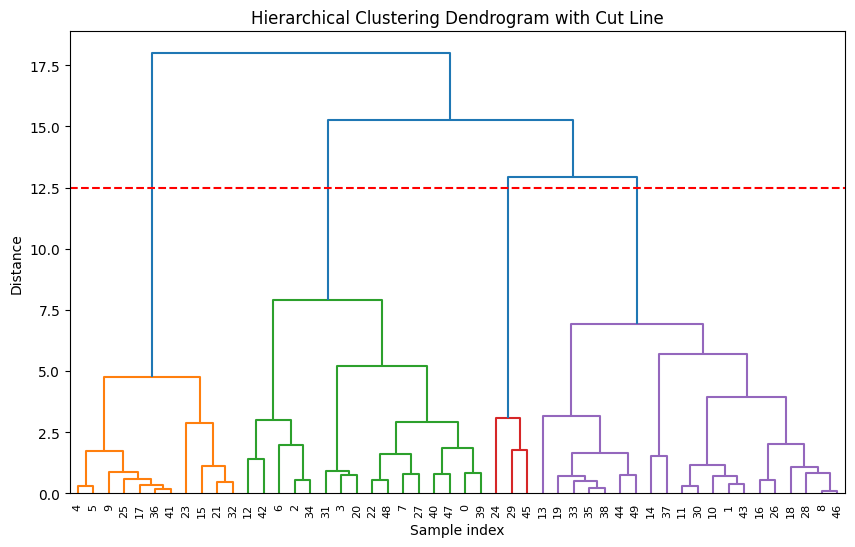

In [4]:
# Define the height at which you want to cut the dendrogram
cut_height = 12.5

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90)  # Rotate leaf labels for better readability

# Add the cut line to the dendrogram
plt.axhline(y=cut_height, color='r', linestyle='--')

plt.title('Hierarchical Clustering Dendrogram with Cut Line')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Save as JPEG for textbook publication purposes
plt.savefig('Figure 14.13 Hierarchical Clustering Dendrogram with Cut Line.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

# Your project

Saving 14_your_project_hierarchical_clustering.csv to 14_your_project_hierarchical_clustering.csv


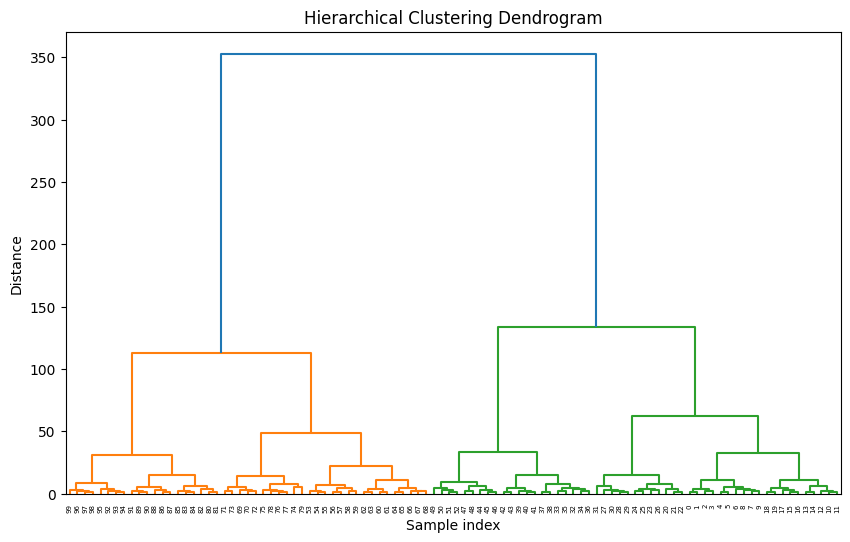

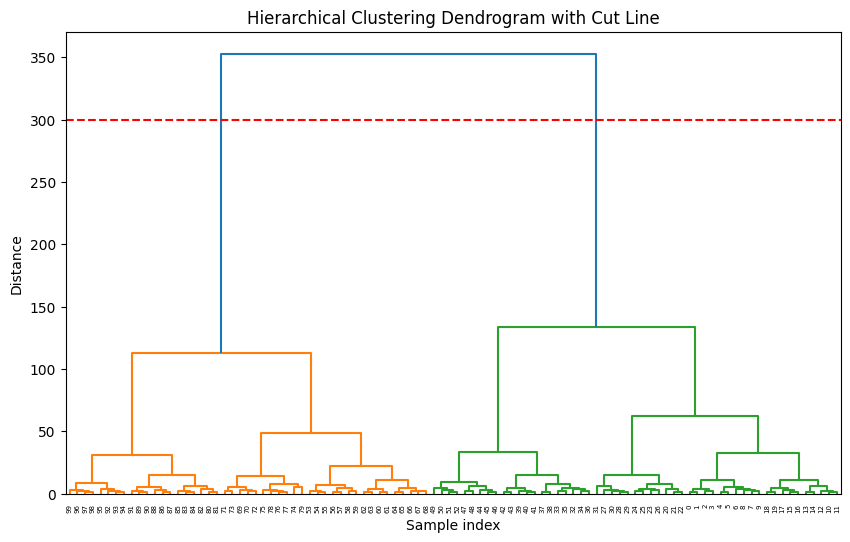

In [5]:
# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

# Step 2: Read the uploaded CSV file
import pandas as pd
df = pd.read_csv('14_your_project_hierarchical_clustering.csv')

# Step 3: Perform hierarchical clustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix using the 'ward' method
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Step 4: Define cut height and plot dendrogram with cut line
cut_height = 300  # Adjust this value to experiment with the cut

plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90)
plt.axhline(y=cut_height, color='r', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram with Cut Line')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
